In [1]:
from graph import Node
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "UD"})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(
            name=uid,
            label="{ %s | data %.2f | grad %.3f  }" % (n.label, n.data, n._grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [2]:
# Sigmoid example from
# https://cs231n.github.io/optimization-2/
# inputs x1,x2
x0 = Node(-1, label='x0')
x1 = Node(-2, label='x1')
# weights w0, w1, w2
w0 = Node(2, label='w0')
w1 = Node(-3, label='w1')
w2 = Node(-3, label='w2')

u1 = x0*w0; u1.label = 'u1'
u2 = x1*w1; u2.label = 'u2'
u3 = u1 + u2; u3.label = 'u3'
u4 = u3 + w2; u4.label = 'u4'
u5 = u4.times_minus_one(); u5.label = 'u5'
u6 = u5.exp(); u6.label = 'u6'
u7 = u6.plus_one(); u7.label = "u7"
u8 = u7.reciprocal(); u8.label = 'u8'
u8.backward()

order of backprop: 
Node(data=0.7310585786300049, label=u8, grad=1)
Node(data=1.3678794411714423, label=u7, grad=0.0)
Node(data=0.36787944117144233, label=u6, grad=0.0)
Node(data=-1, label=u5, grad=0.0)
Node(data=1, label=u4, grad=0.0)
Node(data=4, label=u3, grad=0.0)
Node(data=-2, label=u1, grad=0.0)
Node(data=-1, label=x0, grad=0.0)
Node(data=2, label=w0, grad=0.0)
Node(data=6, label=u2, grad=0.0)
Node(data=-2, label=x1, grad=0.0)
Node(data=-3, label=w1, grad=0.0)
Node(data=-3, label=w2, grad=0.0)


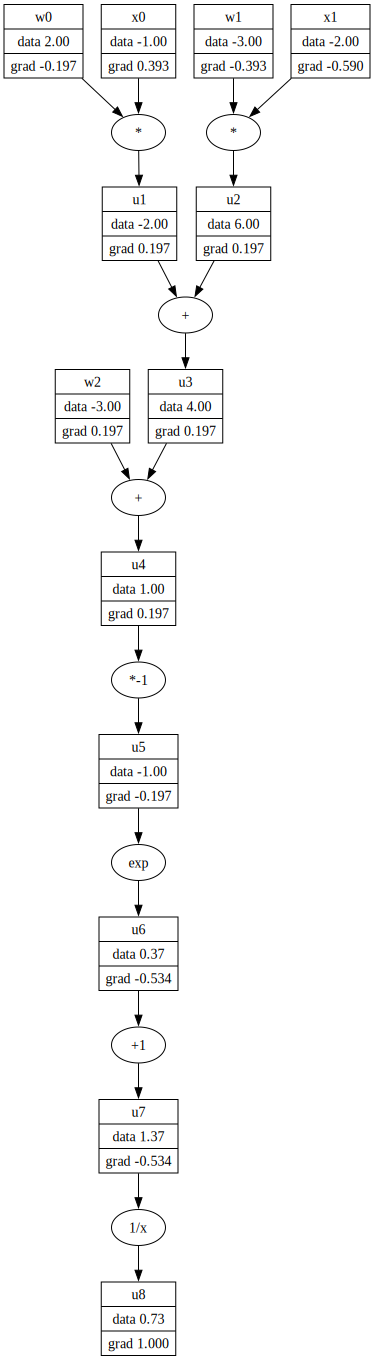

In [3]:
draw_dot(u8)

In [4]:
print(w0._grad)
print(w1._grad)
print(w2._grad)

-0.19661193324148188
-0.39322386648296376
0.19661193324148188


In [5]:
# Implementation in Pytorch
import torch

# Sigmoid example from
# https://cs231n.github.io/optimization-2/
# inputs x1,x2

x0 = torch.Tensor([-1]).double(); x0.requires_grad = True
x1 = torch.Tensor([-2]).double(); x1.requires_grad = True
w0 = torch.Tensor([2]).double(); w0.requires_grad = True
w1 = torch.Tensor([-3]).double(); w1.requires_grad = True
w2 = torch.Tensor([-3]).double(); w2.requires_grad = True

u1 = x0*w0
# print(u1)
u2 = x1*w1
# print(u2)
u3 = u1 + u2
# print(u3)
u4 = u3 + w2
# print(u4)
d1 = torch.Tensor([-1])
u5 = u4 * d1
# print(u5)
u6 = u5.exp()
d2 = torch.Tensor([1])
u7 = u6 + d2
u8 = u7.reciprocal()
u8.backward()

# Verify that this matches the above micrograd implementation
print(w0._grad.item())
print(w1._grad.item())
print(w2._grad.item())

-0.19661193324148188
-0.39322386648296376
0.19661193324148188
